Continuous-time model
---

Let's order the infection times $t_{\pi_{1}}<t_{\pi_{2}}<\dots<t_{\pi_{N}}$
. Let $\lambda_{i}\left(t\right)$ be a time-dependent transmission
rate and $L_{i}\left(t\right)=\int_{0}^{t}\lambda_{ij}\left(s\right)ds$
its primitive. Then $\rho_{i}\left(t_i; t_j\right)=\lambda_{i}\left(t_i\right)e^{-\int_{t_j}^{t_i}\lambda_{i}\left(s\right)ds} = \lambda_{i}\left(t_j\right)e^{L_{i}(t_j) - L_{i}(t_i) }$
will be the transmission ``delay'' density distribution. 

\begin{align*}p\left(t_{1},\dots,t_{N}\right) & =\prod_{i=1}^{N}\lim_{ds\to0^{+}}\frac{\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}-\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}}{ds}\\
 & =\prod_{i=1}^{N}\frac{d}{ds}_{|s=0}\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i}-ds)}\\
 & =\prod_{i=1}^{N}\left\{ \left(\prod_{j\in\partial i:t_{j}<t_{i}}e^{L_{i}(t_{j})-L_{i}(t_{i})}\right)\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right\} \\
\mathcal{L}_{0}\left(t_{1},\dots,t_{N}\right) & =\log p\left(t_{1},\dots,t_{N}\right)\\
 & =-\sum_{i=1}^{N}\left\{ \sum_{j\in\partial i:t_{j}<t_{i}}\left(L_{i}(t_{i})-L_{i}(t_{j})\right)-\log\left(\sum_{j\in\partial i:t_{j}<t_{i}}\lambda_{i}\left(t_{i}\right)\right)\right\} 
\end{align*}

Note that $$\int_{t_j}^{t_i} \rho_{i}(s; t_j) ds = 1-e^{-\left(L_{i}(t_i) - L_{i}(t_j)\right)}$$ so $$\lambda_{i}(t) = -\frac{d}{dt}\log \left(1-\int_{t_j}^{t_i} \rho_{i}(s) ds\right)$$


\begin{align}\lambda(t) & =ae^{-\left(\frac{t-b}{c}\right)^{2}}\\
\frac{x-b}{c} & =\frac{y}{\sqrt{2}}\\
dx & =\frac{c}{\sqrt{2}}dy\\
L(t)=\int_{0}^{t}ae^{-\left(\frac{x-b}{c}\right)^{2}}dx & = ac\int_{\frac{0-b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =ac\sqrt{\pi}\frac{1}{\sqrt{\pi}}\int_{-\frac{b}{c}}^{\frac{t-b}{c}}e^{-y^{2}}dy\\
 & =\frac{ac\sqrt{\pi}}{2}\left(\mathrm{erfc}\left(-\frac{t-b}{c}\right)-\mathrm{erfc}\left(\frac{b}{c}\right)\right)\\
\rho_{i}\left(t_{i};t_{j}\right) & =\lambda_{i}\left(t_{i}\right)e^{-\int_{t_{j}}^{t_{i}}\lambda_{i}\left(s\right)ds}=\lambda_{i}\left(t_{i}\right)e^{L_{i}(t_{j})-L_{i}(t_{i})}\\
\frac{d}{ds}-e^{L_{i}(t_{j})-L_{i}(s)} & =\lambda\left(s\right)e^{L_{i}(t_{j})-L_{i}(s)}=\rho_{i}\left(s;t_{j}\right)\\
\end{align}

Sampling 
---
\begin{align}
\int_{t_{j}}^{t}\rho(s;t_{j})ds & =1-e^{L_{i}(t_{j})-L_{i}(t)}=1-r\sim U(0,1)\\
e^{L_{i}(t_{j})-L_{i}(t)} & =r\\
L_{i}(t) & =L_{i}\left(t_{j}\right)-\log(r)\\
\mathrm{erfc}\left(-\frac{t-b}{c}\right) & =\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\\
t & =-c\,\mathrm{ierfc}\left(\frac{2}{ac\sqrt{\pi}}\left(L_{i}\left(t_{j}\right)-\log(r)\right)+\mathrm{erfc}\left(\frac{b}{c}\right)\right)+b
\end{align}

In [1]:
using Causality
using IntervalUnionArithmetic

In [215]:
using SparseArrays, LinearAlgebra
T, N = 20.0, 50
ρ = 3/N
G = Causality.makeGNP(N,ρ)

Causality.SparseMatrixDiGraph{Int64}(sparse([14, 17, 42, 49, 50, 5, 18, 15, 3, 18  …  17, 44, 50, 12, 1, 29, 31, 1, 24, 47], [1, 1, 1, 1, 1, 3, 3, 4, 5, 6  …  47, 47, 47, 48, 49, 49, 49, 50, 50, 50], [π, π, π, π, π, π, π, π, π, π  …  π, π, π, π, π, π, π, π, π, π], 50, 50), sparse([14, 17, 42, 49, 50, 5, 18, 15, 3, 18  …  17, 44, 50, 12, 1, 29, 31, 1, 24, 47], [1, 1, 1, 1, 1, 3, 3, 4, 5, 6  …  47, 47, 47, 48, 49, 49, 49, 50, 50, 50], [32, 41, 92, 109, 112, 9, 44, 34, 6, 45  …  43, 99, 114, 29, 4, 71, 75, 5, 60, 107], 50, 50))

In [216]:
getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N)]


getpar(pseed,autoinf::GaussianRate,inf_in::GaussianRate, latency::GaussianRate, recov::GaussianRate) = 
    [fill(pseed, 1, N);
     fill(autoinf.a, 1, N); fill(autoinf.b, 1, N); fill(autoinf.c, 1, N);
     fill(inf_in.a,   1, N); fill(inf_in.b, 1, N); fill(inf_in.c, 1, N);
     fill(latency.a, 1, N); fill(latency.b, 1, N); fill(latency.c, 1, N);
     fill(recov.a, 1, N); fill(recov.b, 1, N); fill(recov.c, 1, N)
    ]

getpar (generic function with 2 methods)

In [256]:
#Initialize generation parameters
ε = 1e-10
λ = 0.6
pseed = 1/N 
autoinf = GaussianRate(ε, T/2, 1/ε)
inf_in = GaussianRate(1.0, T/2, 1/ε)
latency = GaussianRate(1., T/2, 1/ε)
recov = GaussianRate(1., T/2, 1/ε)


l_delay = GaussianRate(0.8, 2., 3.)
r_delay = GaussianRate(0., 6., 4.)
out = GaussianRate(λ, 4., 4.)

θp = getpar(pseed, autoinf, inf_in, latency, recov);

In [257]:
#Initialize min/max boundaies
pseed_min = ε
pseed_max = 1-ε
rate_min = GaussianRate(ε  ,  -T,   ε)
rate_max = GaussianRate(1/ε  ,  2T,   1/ε)

θmin = getpar(pseed_min , rate_min, rate_min, rate_min, rate_min);
θmax = getpar(pseed_max , rate_max, rate_max, rate_max, rate_max);

In [258]:
const I = IndividualSEIR{GaussianRate,GaussianRate,GaussianRate,GaussianRate}

IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}

In [259]:
Mp = StochasticModel(I, T, θp, G, (out, l_delay, r_delay));
sample! = Sampler(Mp);

In [264]:
xtrue = zeros(N,3)
sample!(xtrue)
nobs, p = 5, 1e-6
O = [(ti = T*(1+rand())/2; (i,xtrue[i,2] < ti < xtrue[i,3],ti,p)) for i=1:nobs]

5-element Vector{Tuple{Int64, Bool, Float64, Float64}}:
 (1, 0, 14.044712417949262, 1.0e-6)
 (2, 0, 10.575998636436047, 1.0e-6)
 (3, 0, 14.478803133136651, 1.0e-6)
 (4, 0, 13.51809455302946, 1.0e-6)
 (5, 0, 18.71257714062651, 1.0e-6)

In [263]:
xtrue

50×3 Matrix{Float64}:
  2.96718   3.59146   6.17567
 20.0      20.0      20.0
 20.0      20.0      20.0
 20.0      20.0      20.0
 20.0      20.0      20.0
 20.0      20.0      20.0
 12.7431   15.4915   20.0
  7.55361   9.26524  13.1356
 20.0      20.0      20.0
 10.7059   12.2035   14.1176
  7.45151   9.79797  20.0
  7.21296  11.0849   11.9603
  9.77067  20.0      20.0
  ⋮                  
 10.9753   11.6135   20.0
 12.6095   13.1631   20.0
 20.0      20.0      20.0
  5.7884    5.90335  17.4197
 20.0      20.0      20.0
  7.93473   9.41515  12.9728
 20.0      20.0      20.0
  7.24207   8.97501  20.0
  6.44456   7.17869  20.0
 20.0      20.0      20.0
  4.21617   5.84222   8.78244
  3.99535   4.74129   8.83781

In [268]:
#Initialize softened model
T = Float64(T)
ε = 2e-3
autoinf = GaussianRate(ε, T/2, 1/ε)
θp2 = getpar(pseed, autoinf, inf_in, latency, recov);
Mp2 = StochasticModel(I, T, θp2, G, (out, l_delay, r_delay));

In [269]:
#Initialize the parameters to learn

autoinf = GaussianRate(1/N, T/2, 2T)
inf_in = GaussianRate(1.0, T/2, 2T)
latency = GaussianRate(1., T/2, 2T)
recov = GaussianRate(1., T/2, 2T)

θ = getpar(pseed, autoinf, inf_in,  latency, recov);
M = StochasticModel(I, T, θ, G, (out, l_delay, r_delay));

In [270]:
using ProgressMeter
ProgressMeter.ijulia_behavior(:clear)
descend!(Mp2, O; M=M, numsamples=4000, numiters=100, 
         θmin=θmin, θmax=θmax, descender=SignDescender(0.1));
descend!(Mp2, O; M=M, numsamples=4000, numiters=100, 
         θmin=θmin, θmax=θmax, descender=SignDescender(0.03));

Progress:  44%|██████████████████                       |  ETA: 0:00:16
  F:  1.824474947574127

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
     [1] [0m[1mForwardDiff.GradientConfig[22m[0m[1m([22m[90mf[39m::[0mCausality.var"#21#22"[90m{Matrix{Float64}, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Tuple{GaussianRate{Float64}, GaussianRate{Float64}, GaussianRate{Float64}}, Vector{UnitRate}}, Int64}[39m, [90mx[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m[0m[1m)[22m
    [90m   @ [39m[35mForwardDiff[39m [90m~/.julia/packages/ForwardDiff/tZ5o1/src/[39m[90m[4mconfig.jl:121[24m[39m
     [2] [0m[1mgradient![22m[0m[1m([22m[90mresult[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m, [90mf[39m::[0mCausality.var"#21#22"[90m{Matrix{Float64}, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Tuple{GaussianRate{Float64}, GaussianRate{Float64}, GaussianRate{Float64}}, Vector{UnitRate}}, Int64}[39m, [90mx[39m::[0mSubArray[90m{Float64, 1, Matrix{Float64}, Tuple{Base.Slice{Base.OneTo{Int64}}, Int64}, true}[39m[0m[1m)[22m
    [90m   @ [39m[35mForwardDiff[39m [90m~/.julia/packages/ForwardDiff/tZ5o1/src/[39m[90m[4mgradient.jl:35[24m[39m
     [3] [0m[1mgradient![22m[0m[1m([22m[90mdθ[39m::[0mMatrix[90m{Float64}[39m, [90mx[39m::[0mMatrix[90m{Float64}[39m, [90mM[39m::[0mStochasticModel[90m{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Tuple{GaussianRate{Float64}, GaussianRate{Float64}, GaussianRate{Float64}}, Vector{UnitRate}}[39m[0m[1m)[22m
    [90m   @ [39m[36mCausality[39m [90m~/git/Causality/src/[39m[90m[4mvariation.jl:115[24m[39m
     [4] [0m[1mmacro expansion[22m
    [90m   @ [39m[90m~/git/Causality/src/[39m[90m[4mvariation.jl:95[24m[39m[90m [inlined][39m
     [5] [0m[1m(::Causality.var"#17#threadsfor_fun#20"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Tuple{GaussianRate{Float64}, GaussianRate{Float64}, GaussianRate{Float64}}, Vector{UnitRate}}, Int64, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Tuple{GaussianRate{Float64}, GaussianRate{Float64}, GaussianRate{Float64}}, Vector{UnitRate}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Vector{Causality.var"#sample!#25"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Tuple{GaussianRate{Float64}, GaussianRate{Float64}, GaussianRate{Float64}}, Vector{UnitRate}}, Causality.var"#updateQ!#24"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Tuple{GaussianRate{Float64}, GaussianRate{Float64}, GaussianRate{Float64}}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, Vector{Int64}, Int64}}, Vector{Float64}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, UnitRange{Int64}})[22m[0m[1m([22m[90monethread[39m::[0mBool[0m[1m)[22m
    [90m   @ [39m[36mCausality[39m [90m./[39m[90m[4mthreadingconstructs.jl:85[24m[39m
     [6] [0m[1m(::Causality.var"#17#threadsfor_fun#20"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Tuple{GaussianRate{Float64}, GaussianRate{Float64}, GaussianRate{Float64}}, Vector{UnitRate}}, Int64, StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Tuple{GaussianRate{Float64}, GaussianRate{Float64}, GaussianRate{Float64}}, Vector{UnitRate}}, Vector{Tuple{Int64, Bool, Float64, Float64}}, Vector{Causality.var"#sample!#25"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Tuple{GaussianRate{Float64}, GaussianRate{Float64}, GaussianRate{Float64}}, Vector{UnitRate}}, Causality.var"#updateQ!#24"{StochasticModel{IndividualSEIR{GaussianRate, GaussianRate, GaussianRate, GaussianRate}, Causality.SparseMatrixDiGraph{Int64}, Tuple{GaussianRate{Float64}, GaussianRate{Float64}, GaussianRate{Float64}}, Vector{UnitRate}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}}, TrackingHeaps.TrackingHeap{Int64, Float64, 2, TrackingHeaps.MinHeapOrder, TrackingHeaps.NoTrainingWheels}, Vector{Int64}, Int64}}, Vector{Float64}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, Vector{Matrix{Float64}}, UnitRange{Int64}})[22m[0m[1m([22m[0m[1m)[22m
    [90m   @ [39m[36mCausality[39m [90m./[39m[90m[4mthreadingconstructs.jl:52[24m[39m

In [176]:
function histo(v; bins=20, up=1.0)
    h = zeros(bins+1)
    z = length(v)
    for x in v
        h[floor(Int, x*bins/up)+1]+=1/z
    end
    h
end

histo (generic function with 1 method)

In [177]:
stats = post(Mp, O, numsamples=10000);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:36


In [178]:
statscau = prior(M);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:02


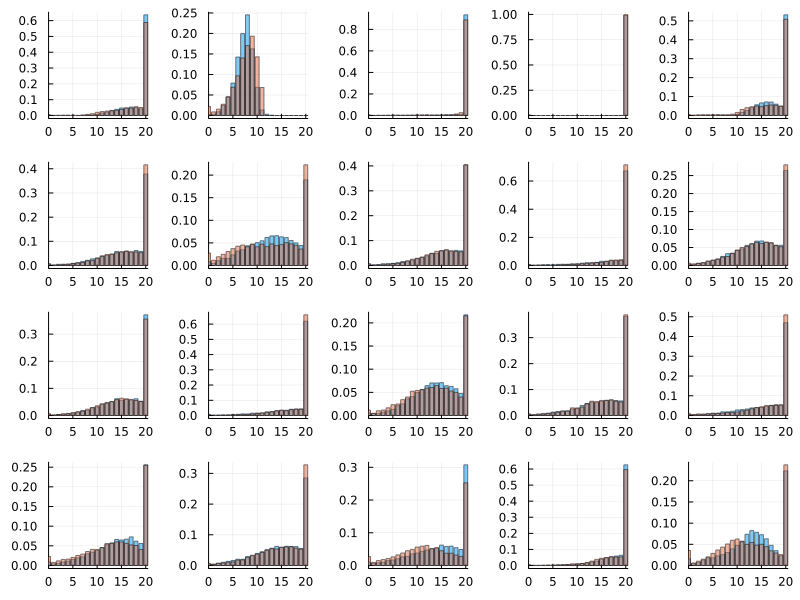

In [265]:
using Plots
state = 1
pl = map(1:20) do k
    p = plot()
    bar!(p, 0:M.T/20:M.T, histo((@view statscau[:, k, state]), up=M.T), alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="cau", legend=false);
    bar!(p, 0:M.T/20:M.T, histo((@view stats[:, k, state]), up=M.T),    alpha=0.5, xlims=(0,M.T+0.5), bins=20, label="true", legend=false);
end;
plot(pl..., size=(800,600))

In [180]:
M.out

(GaussianRate{Float64}(0.5, 4.0, 4.0), GaussianRate{Float64}(0.8, 3.0, 3.0), GaussianRate{Float64}(0.3, 6.0, 4.0))

## Marginals and ROC curve

In [206]:
function marginal(i, t, stats)
    numsamp = size(stats,1)
    sum( stats[:,i,2] .< t .< stats[:,i,3] ) / numsamp
end

function tpr(xtrue, rank) 
    den = sum(xtrue[rank])
    if den != 0
        return cumsum(xtrue[rank]) ./ den
    else
        return ones(size(rank))
    end
end

function fpr(xtrue, rank) 
    N = size(rank,1)
    return (range(1,N,length=N) .- cumsum(xtrue[rank])) ./ (range(1,N,length=N) .- cumsum(xtrue[rank]) )[end]
end

function ROC(xtrue, p)
    N = size(xtrue,1)
    rank = sortperm(p, rev=true)
    
    return fpr(xtrue, rank) , tpr(xtrue, rank)
end

function AUROC(ROC)
    N = size(ROC[1],1) 
    AU = 0
    for t = 1:N-1
        AU += ROC[2][t] * (ROC[1][t+1] - ROC[1][t])
    end
    return AU
end

AUROC (generic function with 1 method)

In [207]:
xtrue

200×3 Matrix{Float64}:
  0.0       1.02192   3.71637
  8.82018   9.60708  20.0
 20.0      20.0      20.0
 20.0      20.0      20.0
 20.0      20.0      20.0
 12.2974   13.2864   18.2147
 17.3317   18.8647   20.0
 15.8412   18.1085   18.9794
 20.0      20.0      20.0
 17.4507   20.0      20.0
 14.3814   14.9651   20.0
 15.3097   20.0      20.0
  6.65538   8.98772  11.2628
  ⋮                  
 15.1208   17.3834   17.5932
 20.0      20.0      20.0
 20.0      20.0      20.0
 15.3598   17.0806   20.0
 20.0      20.0      20.0
 13.7114   17.0279   20.0
 12.3154   13.0085   20.0
 20.0      20.0      20.0
 20.0      20.0      20.0
 20.0      20.0      20.0
 10.1791   13.4385   19.7321
 20.0      20.0      20.0

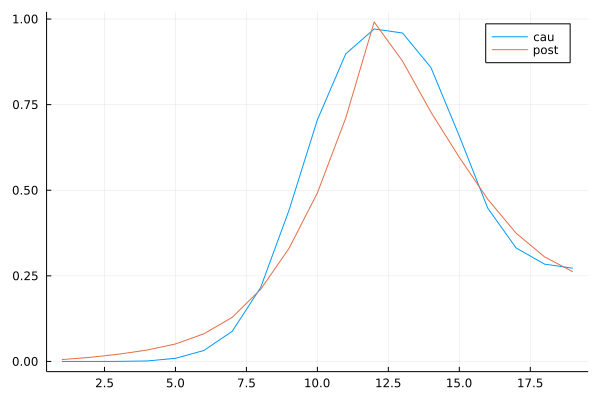

In [208]:
using Plots
p_cau = zeros(N,Int(T))
p_exact = zeros(N,Int(T))
for i = 1:N
    for t = 1:Int(T)
       p_cau[i,t] = marginal(i, t, statscau)
       p_exact[i,t] = marginal(i, t, stats)
    end
end
i = 2
plot(p_cau[i,1:end-1], label = "cau")
plot!(p_exact[i,1:end-1], label = "post")

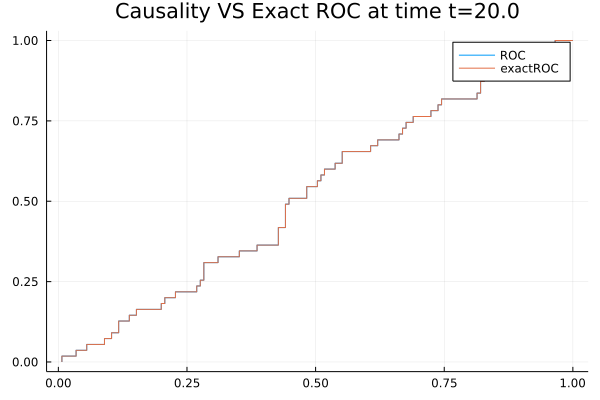

In [213]:
#Let us find the ROC of the infected individuals at time t
t = T
epidemic_risk=zeros(N)
true_risk=zeros(N)
for i=1:N
   epidemic_risk[i] = marginal(i,t,statscau)
   true_risk[i] = marginal(i,t,stats)
end
xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
plot(ROC(xt, epidemic_risk)[1],ROC(xt, epidemic_risk)[2], label="ROC", title="Causality VS Exact ROC at time t=$t")
plot!(ROC(xt, true_risk)[1],ROC(xt, true_risk)[2], label="exactROC")

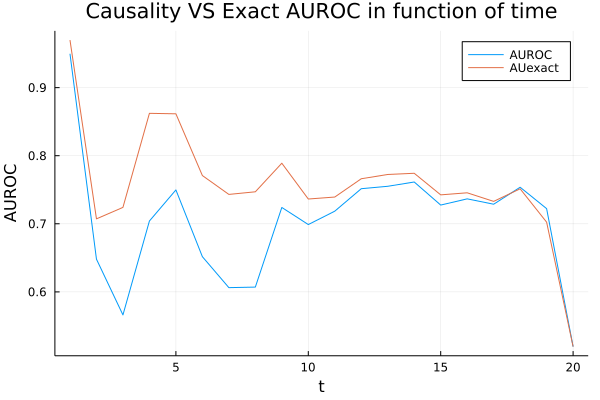

In [214]:
T = Int(T)
AU_curve=zeros(T)
AU_exact=zeros(T)
for t = 1:T
    epidemic_risk=zeros(N)
    true_risk=zeros(N)
    for i=1:N
       epidemic_risk[i] = marginal(i,t,statscau)
       true_risk[i] = marginal(i,t,stats)
    end
    xt = xtrue[:,2] .< t-1e-3 .< xtrue[:,3]
    AU_curve[t] = AUROC(ROC(xt, epidemic_risk))
    AU_exact[t] = AUROC(ROC(xt, true_risk))
end

plot(LinRange(1,T,T),AU_curve, label="AUROC", title="Causality VS Exact AUROC in function of time")
plot!(LinRange(1,T,T),AU_exact, label="AUexact")
T = Float64(T)
#savefig("SEIR_AUROC.pdf")
xlabel!("t")
ylabel!("AUROC")